# Практическая работа №1: Алгоритмы эффективного вычисления одночленов

Выполнил студент гр. 1304 Клепнёв Данила. Вариант №37.

## Цель работы

Сформировать знания о работе алгоритмах вычисления одночленов за минимальное число операций, привить навык использования систем компьютерной математики для реализации алгоритмов.

## Основные теоретические положения
Используемые обозначения:  
$\lambda(n)=\lfloor{\log_2 (n)}\rfloor$ - уменьшенная на единицу длина бинарной записи числа $n$;  
$\nu(n)$ - вес Хэмминга для бинарной записи числа $n$.

## Бинарный метод "SX"
Для того, чтобы возвести число в степень $n$, необходимо:
<ol>
<li>Представить $n$ в бинарном виде $n = (a_m, a_{m-1}, ..., a_1)_2, a_m = 1$;</li>
<li>Отбрасываем старший бит:  
$n = (a_{m-1}, a_{m-2}, ..., a_1)_2 $;</li>
<li>Делаем замену по следующему правилу:
    <ul>
    <li>$a_i = 1 \Rightarrow a_i = SX$;</li>
    <li>$a_i = 0 \Rightarrow a_i = S$.</li>
    </ul>  
После чего получаем строку из элементов $"S"$ и $"X"$.</li>
<li>Выполняем вычисление, примем $result = x$. Следуя по полученной на прерыдущем шаге последовательности, вычисляем $result$ следующим образом:
    <ul>
    <li>$result = result^2$, если $a_i = S$;</li>
    <li>$result = x*result$, если $a_i = X$.</li>
    </ul></li>
</ol>
Число операций умножения при выполнении бинарного метода "SX" равно $\lambda(n) + \nu(n) - 1$.

## Бинарный метод возвдения в степень справа на лево
<ol>
<li>Зададим начальные условия, примем: $N = n$, $Y = 1$, $Z = x$;</li>  
<li>Если $N$ четно, переходим на 3 пункт, иначе на 4 пункт;</li>  
<li>$N = \lfloor{N/2}\rfloor$, $Z = Z*Z$, переходим на 2 пункт;</li>  
<li>$N = \lfloor{N/2}\rfloor$, $Y = Z*Y$;</li>  
<li>Если $N$ равно 1, алгоритм возвращает в качестве ответа $Y$ и прекращает свою работу. Иначе, полагаем $Z = Z*Z$ и переходим на 2 пункт.</li>
</ol>
Число операций умножения при выполнении бинарного метода справа налево равно $\lambda(n) + \nu(n)$.

## Метод множителей
<ol>
    <li>Представляем $n$ в виде разложения $n = p * q$, где $p$ - наименьший простой множитель $n$, а $q > 1$. Таким образом, $x^n$ можно найти, вычислив $x^p$ и возведя эту величину в степень $q$;</li>
    <li>Если $n$ - простое, то можно сначала вычислить $x^{n-1}$ и умножить его на $x$;</li>
    <li>При $n = 1$ - получаем $x^n$ без каких-либо вычислений. Работает для $\forall n \in \mathbb{N}$</li>
</ol>
Следуя этим шагам можно раскладывать (тем самым вычисляя) $p$ на любом шаге, и в конце концов получить $x^n$

### Дерево степеней
<ol>
    <li>На нулевом уровне в дереве только один узел - $1$. Это корень дерева;</li>
    <li>Пусть построен $k$-ый уровень. Необходимо построить $(k+1)$-ый уровень;</li>
    <li>Берём каждый узел $n$ на $k$-м уровне слева направо и присоединяем к нему снизу узлы $n+a_{0}, n+a_{1}, ..., n+a_{k-1} = 2n$;</li>
    <li>Порядок присоединения важен. Значения $a_i$ представляют собой путь от корня дерева до узла $n$;</li>
    <li>Если какой-то узел уже появлялся в дереве - он не добавляется.</li>
</ol>

## Постановка задачи

Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.


## Выполнение работы

### Бинарный метод SX
Была реализована функция $\textit{SX()}$, принимающая на вход целочисленное значение - степень $n$, в которую нужно возвести число при помощи бинарного метода "SX".

In [ ]:
def SX(n):
    assert(n > 0)
    var('x')
    result = x
    n_2 = bin(n)[3:]
    modified_string = ''.join(['SX' if i == '1' else 'S' for i in n_2])
    print(modified_string)
    for i in range(len(modified_string)):
        if modified_string[i] == 'S':
            result **= 2
        else:
            result *= x
        print(f'{i + 1}) {result}')
SX(23)  

Приведены примеры работы программы при некоторых $n$:

In [23]:
SX(36)

SSSXSS
1) x^2
2) x^4
3) x^8
4) x^9
5) x^18
6) x^36


In [32]:
SX(14)

SXSXS
1) x^2
2) x^3
3) x^6
4) x^7
5) x^14


In [33]:
SX(63)

SXSXSXSXSX
1) x^2
2) x^3
3) x^6
4) x^7
5) x^14
6) x^15
7) x^30
8) x^31
9) x^62
10) x^63


Проверим равны ли теоретические и экспериментальные оценки числа операций:
$n = 36 \Rightarrow \lambda(n) = \lfloor log_2(n) \rfloor = 5;\ \nu(n) = 2;\ \lambda(n) + \nu(n) - 1 = 6 \Rightarrow$ Верно;<br>
$n = 14 \Rightarrow \lambda(n) = \lfloor log_2(n) \rfloor = 3;\ \nu(n) = 3;\ \lambda(n) + \nu(n) - 1 = 5 \Rightarrow$ Верно;<br>
$n = 63 \Rightarrow \lambda(n) = \lfloor log_2(n) \rfloor = 5;\ \nu(n) = 6;\ \lambda(n) + \nu(n) - 1 = 10 \Rightarrow$ Верно.<br>
Можно сделать вывод, что для наших $n$ оценка корректна.
#### Вывод
Таким образом, был реализован бинарный метод "SX" и проверена его работоспособность. Метод является простым для реализации и понимания, при этом является эффективным. Также, благодаря оценке можно легко узнать, за сколько итераций будет произведён расчёт.

### Бинарный метод возвдения в степень справа на лево
Была реализована функция  $\textit{binary_right_to_left_method()}$, принимающая на вход целочисленное значение - степень $n$, в которую нужно возвести число.

In [24]:
def binary_right_to_left_method(n):
    assert(n > 0)
    var('x')
    N = n 
    Y = 1
    Z = x
    iteration = 0
    print(f'| iteration = {iteration} | N = {N} | Y = {Y} | Z = {Z} |')
    while True:
        if N % 2 == 0:
            N //= 2
            Z **= 2
        else:
            N //= 2
            Y *= Z
            if N == 0:
                iteration += 1
                print(f'| iteration = {iteration} | N = {N} | Y = {Y} | Z = {Z} |')
                break
            else:
                Z **= 2
        iteration += 1
        print(f'| iteration = {iteration} | N = {N} | Y = {Y} | Z = {Z} |')
    return Y


Приведены примеры работы программы при некоторых $n$:

In [27]:
show(binary_right_to_left_method(36))

| iteration = 0 | N = 36 | Y = 1 | Z = x |
| iteration = 1 | N = 18 | Y = 1 | Z = x^2 |
| iteration = 2 | N = 9 | Y = 1 | Z = x^4 |
| iteration = 3 | N = 4 | Y = x^4 | Z = x^8 |
| iteration = 4 | N = 2 | Y = x^4 | Z = x^16 |
| iteration = 5 | N = 1 | Y = x^4 | Z = x^32 |
| iteration = 6 | N = 0 | Y = x^36 | Z = x^32 |


x^36

Листинг работы алгоритма для $n=36$:

| № итерации | Значение N | Значение Y | Значение Z |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     36     |      1     |      $x$     |
|      1     |     18     |      1     |    $x^2$   |
|      2     |       9    |      1     |     $x^4$    |
|      3     |      4     |      $x^4$     |     $x^8$    |
|      4     |      2     |      $x^4$     |    $x^{16}$    |
|      5     |      1     |      $x^4$     |    $x^{32}$    |
|      6     |      0     |      $x^{36}$     |    $x^{32}$    |

In [20]:
show(binary_right_to_left_method(14))

| iteration = 0 | N = 14 | Y = 1 | Z = x |
| iteration = 1 | N = 7 | Y = 1 | Z = x^2 |
| iteration = 2 | N = 3 | Y = x^2 | Z = x^4 |
| iteration = 3 | N = 1 | Y = x^6 | Z = x^8 |
| iteration = 4 | N = 0 | Y = x^14 | Z = x^8 |


x^14

Листинг работы алгоритма для $n=14$:

| № итерации | Значение N | Значение Y | Значение Z |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     14     |      1     |     $x$    |
|      1     |     7      |      1     |    $x^2$   |
|      2     |       3    |    $x^2$   |    $x^4$   |
|      3     |      1     |    $x^6$   |    $x^8$   |
|      4     |      0     |   $x^{14}$ |    $x^8$   |

In [21]:
show(binary_right_to_left_method(63))

| iteration = 0 | N = 63 | Y = 1 | Z = x |
| iteration = 1 | N = 31 | Y = x | Z = x^2 |
| iteration = 2 | N = 15 | Y = x^3 | Z = x^4 |
| iteration = 3 | N = 7 | Y = x^7 | Z = x^8 |
| iteration = 4 | N = 3 | Y = x^15 | Z = x^16 |
| iteration = 5 | N = 1 | Y = x^31 | Z = x^32 |
| iteration = 6 | N = 0 | Y = x^63 | Z = x^32 |


x^63

Листинг работы алгоритма для $n=63$:

| № итерации | Значение N | Значение Y | Значение Z |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     63     |      1     |      $x$   |
|      1     |     31     |     $x$    |    $x^2$   |
|      2     |     15     |    $x^3$   |     $x^4$  |
|      3     |      7     |    $x^7$   |     $x^8$  |
|      4     |      3     |  $x^{15}$  |    $x^{16}$|
|      5     |      1     |  $x^{31}$  |    $x^{32}$|
|      6     |      0     |  $x^{63}$  |    $x^{32}$|

Проверим равны ли теоретические и экспериментальные оценки числа операций:
$n = 36 \Rightarrow \lambda(n) = \lfloor log_2(n) \rfloor = 5;\ \nu(n) = 2;\ \lambda(n) + \nu(n)  = 7 \Rightarrow$ Верно;<br>
$n = 14 \Rightarrow \lambda(n) = \lfloor log_2(n) \rfloor = 3;\ \nu(n) = 3;\ \lambda(n) + \nu(n)  = 6 \Rightarrow$ Верно;<br>
$n = 63 \Rightarrow \lambda(n) = \lfloor log_2(n) \rfloor = 5;\ \nu(n) = 6;\ \lambda(n) + \nu(n)  = 11 \Rightarrow$ Верно.<br>
Можно сделать вывод, что для наших $n$ оценка корректна.
#### Вывод
Таким образом, реализован бинарный метод возведения справа налево, проверена его работоспособность и оценка числа операций из теоретического положения. Метод является менее простым для понимания, нежели метод возведения "SX", а также требует на одну операцию больше.

### Сравнение бинарного метода "SX" и метода возведения справа налево
Опираясь на теоретические и практические данные, можно cделать вывод, что метод "SX" проще и требует меньше действий для возведени числа в степень. Количество операций умножения при использовании бинарного метода "SX" равно $\lambda(n) + \nu(n) - 1$, а при использовании метода возведения справа налево - $\lambda(n) + \nu(n)$, из чего следует большая выгодность по времени бинарного метода "SX".

### Метод множителей
Выполним вычисления с помощью метода множителей для прествленных в прошлых алгоритмах примерах примеров $n=36, n=14, n=63$.

#### Метод множителей для n = 36
$x^{36} = (x^2)^{18}$;<br>
$(x^2)^{18} = ((x^2)^2)^9$;<br>
$((x^2)^2)^9 = (((x^2)^2)^3)^3$.<br>
Рассчитаем количество операций:<br>
$x^2 \rightarrow x,\ x^2$ (1 операция);<br>
$(x^2)^2 \rightarrow x^2,\ (x^2)^2$ (+1 операция);<br>
$((x^2)^2)^3 \rightarrow (x^2)^2,\ ((x^2)^2)^2,\ ((x^2)^2)^3$ (+2 операции);<br>
$x^{36} \rightarrow ((x^2)^2)^3,\ (((x^2)^2)^3)^2,\ (((x^2)^2)^3)^3$ (+2 операции);<br>
Всего: 6 операций.

#### Метод множителей для n = 14
$x^{14} = (x^2)^7$;<br>
$(x^2)^7 = x^2 * (x^2)^6$;<br>
$(x^2)^6 = ((x^2)^2)^3$.<br>
Рассчитаем количество операций:<br>
$x^2 \rightarrow x,\ x^2$ (1 операция);<br>
$(x^2)^2 \rightarrow x^2,\ (x^2)^2$ (+1 операция);<br>
$((x^2)^2)^3 \rightarrow (x^2)^2,\ ((x^2)^2)^2,\ ((x^2)^2)^3$ (+2 операции);<br>
$x^{14} \rightarrow ((x^2)^2)^3,\ x^{14}$ (+1 операция);<br>
Всего: 5 операций.

#### Метод множителей для n = 63
$x^{63} = (x^3)^{21}$;<br>
$(x^3)^{21} = ((x^3)^3)^7$;<br>
$((x^3)^3)^7 = (x^3)^3 * ((x^3)^3)^6$;<br>
$((x^3)^3)^6 = (((x^3)^3)^2)^3$.<br>
Рассчитаем количество операций:<br>
$x^3 \rightarrow x,\ x^2,\ x^3$ (2 операции);<br>
$(x^3)^3 \rightarrow x^3,\ (x^3)^2,\ (x^3)^3$ (+2 операции);<br>
$((x^3)^3)^2 \rightarrow (x^3)^3,\ ((x^3)^3)^2$ (+1 операция);<br>
$(((x^3)^3)^2)^3 \rightarrow ((x^3)^3)^2,\ (((x^3)^3)^2)^2,\ (((x^3)^3)^2)^3$ (+2 операции);<br>
$x^{63} \rightarrow (((x^3)^3)^2)^3,\ x^{63}$ (+1 операция);<br>
Всего: 8 операций.

#### Вывод
Данный метод в некторых случаях оказывается быстрее, чем метод "SX" (например, при $n= 63$), в некторых – медленнее (например, n = 33), однако почти всегда метод сравним по количеству итераций с методом "SX". Его минус — сложность реализации.

### Дерево степеней
Был создана функция $degree\_tree\_construction()$, реализующая алгоритм построения дерева степеней до заданного уровня $k$. На вход функции подаётся количество уровней, которые необходимо построить.

In [51]:
def degree_tree_construction(n):
    flag = False
    degreeTree = Graph()
    degreeTree.add_vertex(1)
    addedVertices = [1]
    while flag == False:
        newVertices = []
        for element in addedVertices:
            path = degreeTree.shortest_path(1, element)
            for vert in path:
                newVertice = element + vert
                if newVertice not in degreeTree.vertices():
                    degreeTree.add_vertex(newVertice)
                    degreeTree.add_edge(element, newVertice)
                    newVertices.append(newVertice)
                    if newVertice == n:
                        flag = True
        addedVertices = newVertices 
    return degreeTree

Была реализована функция $FindPath()$ для поиска пути возведения числа в степень $n$.

In [52]:
def FindPath(tree, node):
    path = []
    verticePath = tree.shortest_path(1, node)
    for i in range(len(verticePath) - 1):
        path.append((verticePath[i], verticePath[i+1]))
    return path
    

Была реализована функция $ShowDegreeTree()$ для отображения дерева и пути до данной вершины, если таковая существует,  на экран.

In [34]:
def ShowDegreeTree(n):
    tree = degree_tree_construction(n)
    plt = tree.plot(layout = 'tree', tree_root = 1, figsize=(15, 6), vertex_color = 'lightgreen', edge_colors={(1, 0, 0): FindPath(tree, n)})
    plt.show()

Приведены примеры работы программы при некоторых  $n$:

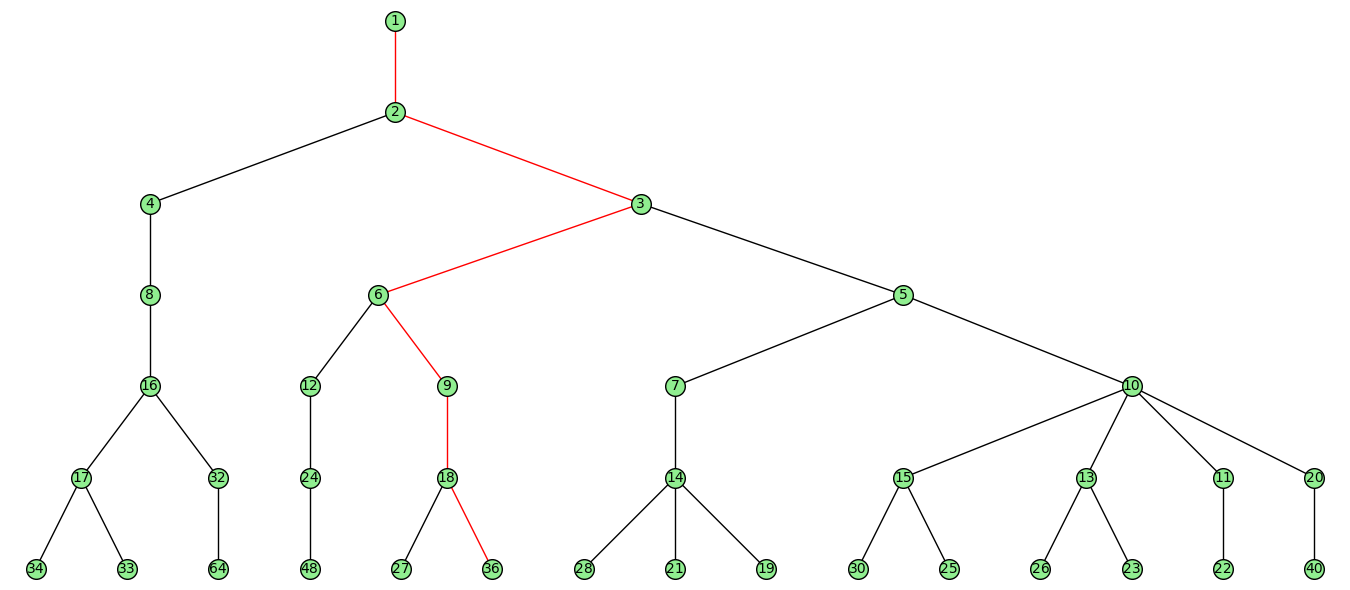

In [53]:
ShowDegreeTree(36)

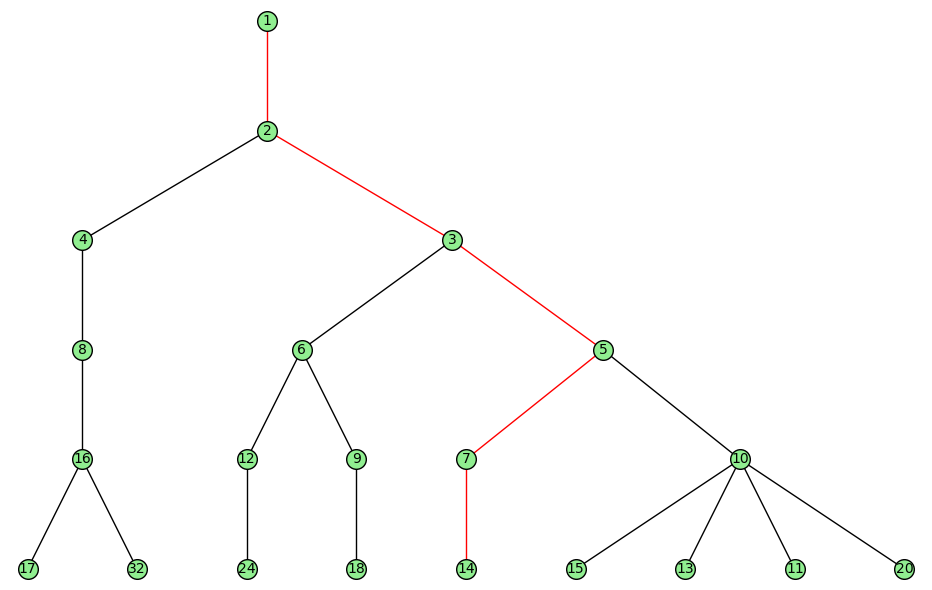

In [54]:
ShowDegreeTree(14)

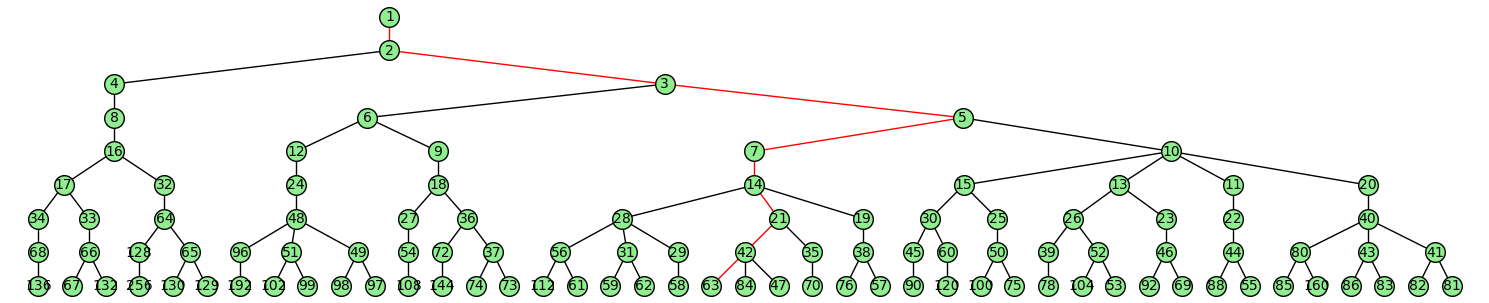

In [55]:
ShowDegreeTree(63)

Была написана функция $SxAndDegreeTreeComparison()$ для сравнения двух методов.

In [45]:
def SxAndDegreeTreeComparison():
    tree = degree_tree_construction(5000)
    for i in range(2, 1000):
        if (floor(log(i, 2)) + bin(i)[2:].count('1') - 1) < len(tree.shortest_path(1, i)) - 1:
            print("not Good")
            return
    print("Good")
    
SxAndDegreeTreeComparison()

Good


#### Вывод
В результате сравнения этого метода с бинарным "𝑆𝑋" - мы обнаружили, что дерево степеней делает столько же операций, а иногда и меньше (например, при $n=63$), для нахождения степени числа. Поэтому данный метод выигрывает метод возведения справа налево. Кроме того, он является довольно эффективным.

### Измененное дерево степеней
Была реализована функция $CreatingDescendingDegreeTree()$ для получения дерева убывающих степеней. Теперь узлы, расположенные ниже $k$-го узла присоедяются следующим образом:  
$i+a_{k-1},\ ...,\ i+a_{1},\ i+a_{0}$.

In [72]:
def CreatingDescendingDegreeTree(n):
    flag = False
    degreeTree = Graph()
    degreeTree.add_vertex(1)
    addedVertices = [1]
    while flag == False:
        newVertices = []
        for element in addedVertices:
            path = degreeTree.shortest_path(1, element)
            for vert in path:
                newVertice = element + vert
                if newVertice not in degreeTree.vertices():
                    degreeTree.add_vertex(newVertice)
                    degreeTree.add_edge(element, newVertice)
                    newVertices.append(newVertice)
                    if newVertice == n:
                        flag = True
        addedVertices = sorted(newVertices)[::-1]
    return degreeTree

Была реализована функция $ShowDescendingDegreeTree()$ для отображения на экран полученного дерева.

In [67]:
def ShowDescendingDegreeTree(n):
    tree = CreatingDescendingDegreeTree(n)
    plt = tree.plot(layout = 'tree', tree_root = 1, figsize=(15, 6),vertex_color = 'lightgreen', edge_colors={(1, 0, 0): FindPath(tree, n)})
    plt.show()

Приведены примеры работы программы при некоторых $n$:

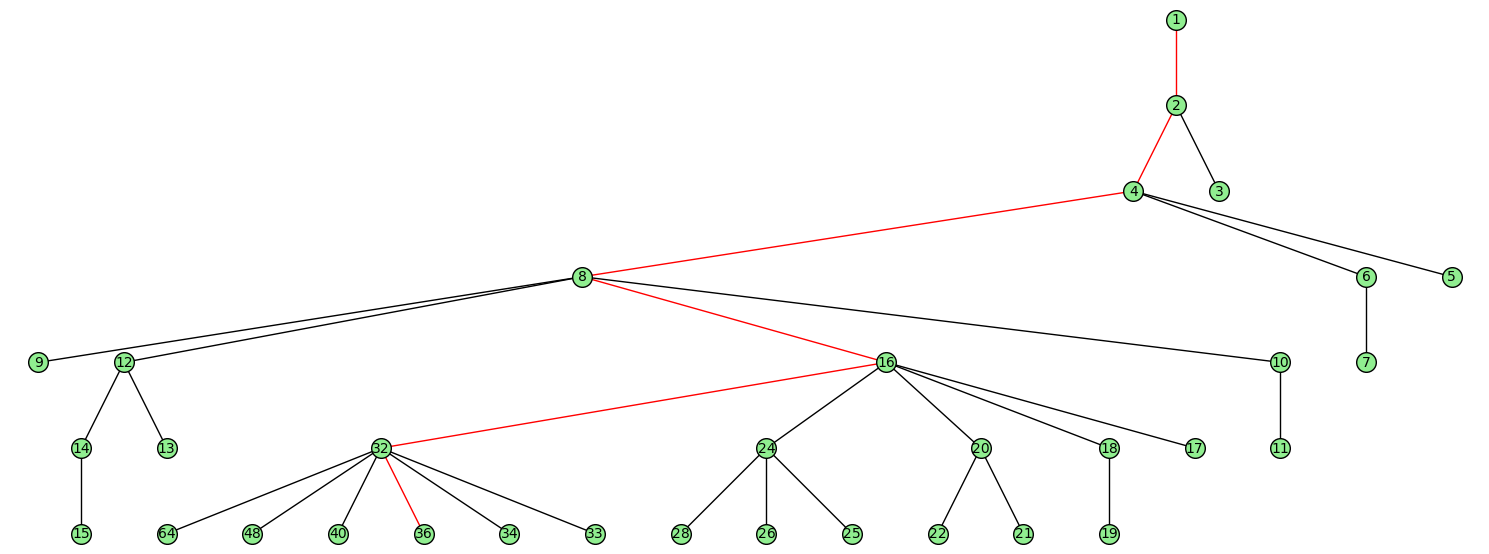

In [75]:
ShowDescendingDegreeTree(36)

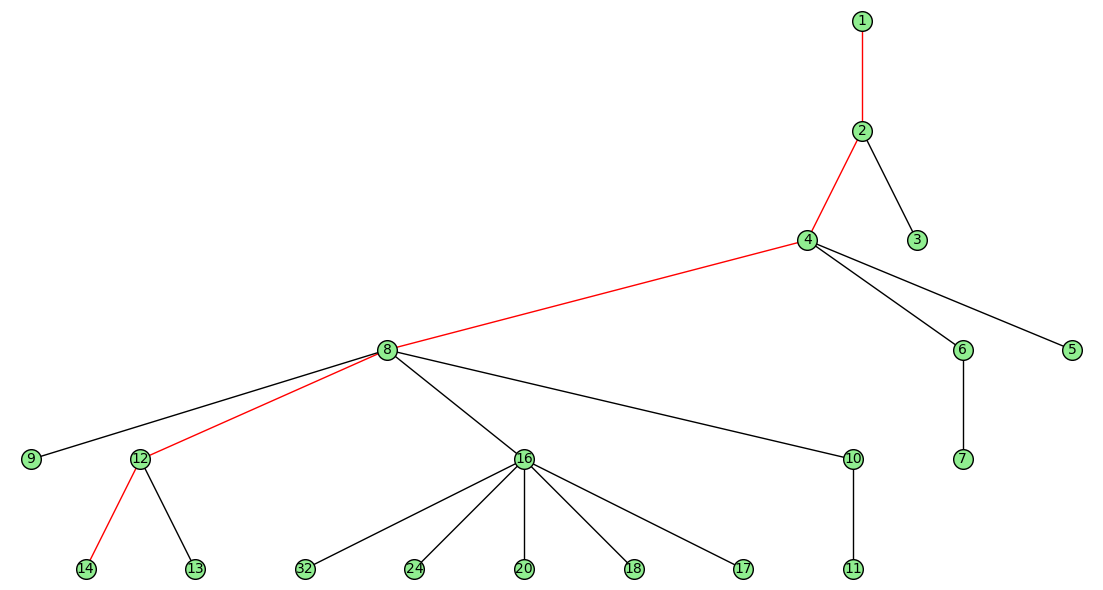

In [74]:
ShowDescendingDegreeTree(14)

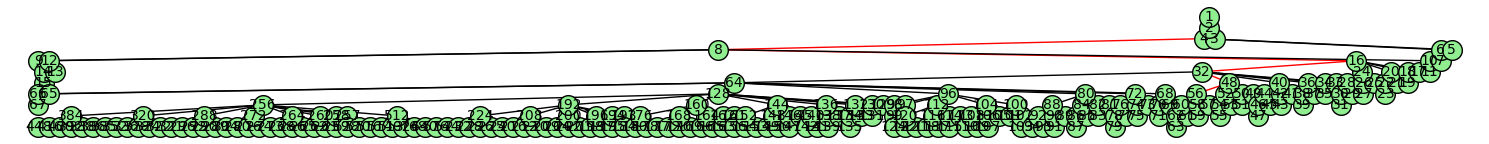

In [77]:
ShowDescendingDegreeTree(63)

Была написана функция $SxAndDescendingDegreeTreeComparison()$ для сравнения двух методов.

In [79]:
def SxAndDescendingDegreeTreeComparison():
    tree = CreatingDescendingDegreeTree(3000)
    for i in range(2, 1000):
        if (floor(log(i, 2)) + bin(i)[2:].count('1') - 1) != len(tree.shortest_path(1, i)) - 1:
            print("not Good")
            return
    print("Good")
    
SxAndDescendingDegreeTreeComparison()

Good


## Выводы

Были получены и применены на приктике знания о работе методов вычисления мономов за минимальное число операций. Реализован бинарный метод "SX", бинарный метод возведения в степень справа налево и рассмотрен метод множителей. А также реализовано дерево степеней и дерево убывающих степеней и произведено их сравнение с бинарным методом "SX". Был получен навык использования системы компьютерной алгебры $\textit{SageMath}$ для реализации алгоритмов.